<a href="https://colab.research.google.com/github/akhilkanugolu/DL_ICP3/blob/master/DL_ICP3_Q3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
cats = ['alt.atheism', 'sci.space']
df = fetch_20newsgroups(subset='train', shuffle=True, categories=cats)
sentences=df.data
y=df.target

In [0]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [0]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(X_train_tokens,maxlen=max_review_len)
paded_test = pad_sequences(X_test_tokens,maxlen=max_review_len)

In [5]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #changing number of neuron to 2 as we have only two labels Pos and Neg
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(padded_train,y_train, epochs=5, verbose=True, validation_data=(paded_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 804 samples, validate on 269 samples
Epoch 1/5
804/804 [==============================] - 22s 27ms/step - loss: 9.7127 - acc: 0.4900 - val_loss: 8.9724 - val_acc: 0.4089
Epoch 2/5
804/804 [==============================] - 19s 24ms/step - loss: 6.2578 - acc: 0.4826 - val_loss: 4.6029 - val_acc: 0.5911
Epoch 3/5
804/804 [==============================] - 19s 24ms/step - loss: 2.8424 - acc: 0.4950 - val_loss: 1.7501 - val_acc: 0.5948
Epoch 4/5
804/804 [==============================] - 19s 24ms/step - loss: 1.4287 - acc: 0.5473 - val_loss: 1.1237 - val_acc: 0.5948
Epoch 5/5
804/804 [==============================] - 19s 24ms/step - loss: 0.9630 - acc: 0.5647 - val_loss: 0.5792 - val_acc: 0.7435


In [6]:
test_loss, test_acc = model.evaluate(paded_test, y_test)
print(test_acc)

269/269 [==============================] - 2s 7ms/step
0.74349445104599


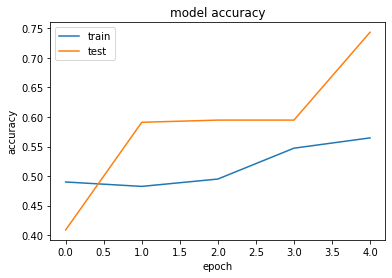

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

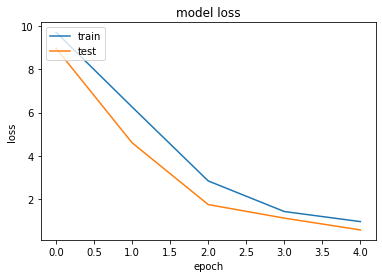

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()